## Annual Average

Let's now begin with plotting the annual averages per unit of latitude and longitude. We should start by loading the data.

In [1]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_monthly_single_1988.nc"
data = xarr.open_dataset(dataFile)

# kelvin to celsius
data["t_celsius"] = data['t2m'] - 273.15

Let's now calculate the annual averages.

In [2]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_precipitation = data['tp'].mean(dim='valid_time')

# calculate nationwide average across the year
temp_timeseries = data['t_celsius'].mean(dim=['latitude', 'longitude'])
precipitation_timeseries = data['tp'].mean(dim=['latitude', 'longitude'])

Now, let's plot the annual average temperature across the continental United States.

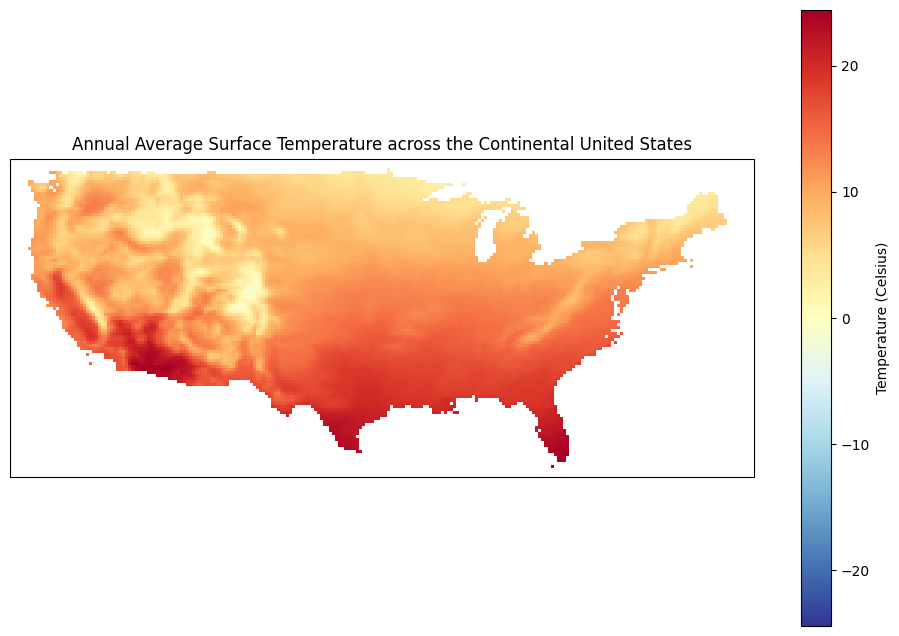

In [3]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Precipitation_Monthly_1988.png")
plot.show()

Then, let's do the average precipitation.

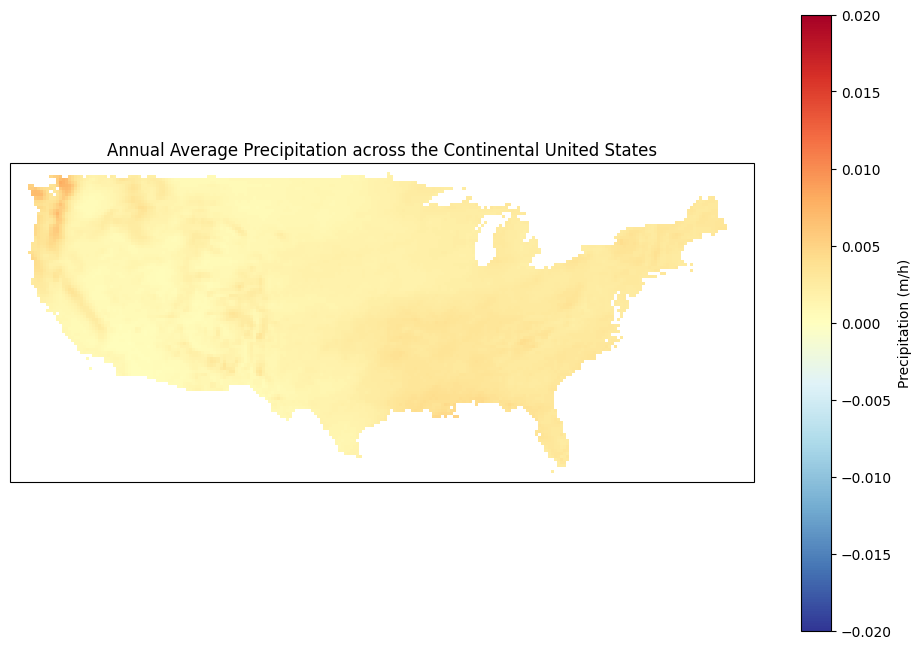

In [4]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
precipitation_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=-0.02, vmax=0.02, add_colorbar=True)
precipitation_plot.colorbar.set_label("Precipitation (m/h)")

# plot, show
plot.title("Annual Average Precipitation across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Temp_Monthly_1988.png")
plot.show()